# Ice Cream Cart Revenue Predictor

![Ice Cream Cart](https://www.goodfreephotos.com/albums/vector-images/ice-cream-stand-vector-clipart.png)

## A Basic Application of Simple Linear Regression
In this module, we will create a predictor for a mock ice cream business. We will predict the daily revenue for our business based on the outside air temperature. Obviously, higher temperatures seem to have some correlation to the consumption of ice cream, and so we will apply a simple linear regression to solve this problem.


## The Mathematics (for those interested)
The main idea beind simple linear regression that we will use in this module is Ordinary Least Squares (OLS). We will determine the coefficients of our regression for our problem given by

$$ y = b_0 + b_1 x $$

Where our independent variable, x, is the ice cream temperature and the dependent variable, y, is the daily revenue in dollars. The coefficeints $b_0$ and $b_1$ are found by solving for sample size $N$

$$ \min RSS(b_0, b_1) = \min \sum_{i=1}^{N}[y_i - b_0 - b_1 x_i]^2$$

where $RSS$ stands for the residual sum of squares. I believe many online videos do a fantastic job of explaining this so I will not divulge in detail what this all means. (We wrote the above equation just for reference for those interested in the math behind this.)

#### Libraries and Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing Dataset

In [2]:
icecream_df = pd.read_csv('IceCreamData.csv')

## Exploratory Data Analysis (EDA)
Let's take a look at our data with some visualizations. Let's begin by inspecting our data and some basic statistics.

In [3]:
icecream_df.head(5)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [14]:
icecream_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temperature,500.0,22.232225,8.096388,0.0,17.122258,22.392791,27.740674,45.0
Revenue,500.0,521.570777,175.404751,10.0,405.558681,529.368565,642.257922,1000.0


In [16]:
icecream_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
Temperature    500 non-null float64
Revenue        500 non-null float64
dtypes: float64(2)
memory usage: 7.9 KB


We don't have any non-null values here, which is very convenient. If we needed to with succsive datasets, we could apply imputation techniques to fill in missing data (e.g. mean imputation).

#### Scatterplot

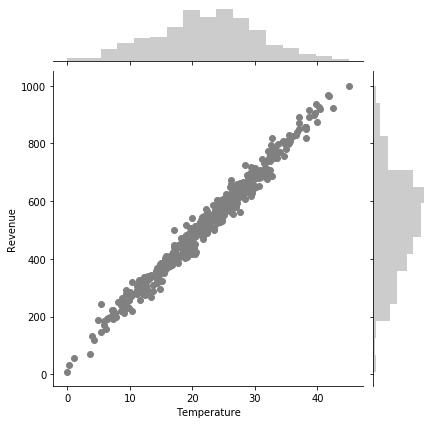

In [21]:
sns.jointplot(x='Temperature', y='Revenue', data=icecream_df, color = 'gray')
plt.show()

Upon visual inspection, our scatterplot indicates a strongly positive linear relationship between temperature and daily revenue. We can break down the visual above into four smaller graphs below:

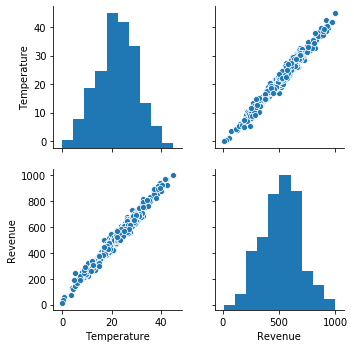

In [25]:
sns.pairplot(icecream_df)
plt.show()

#### Using Seaborn to Visually add a Line of Regression

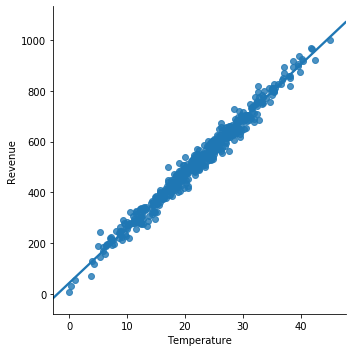

In [24]:
sns.lmplot(x='Temperature', y='Revenue', data=icecream_df)
plt.show()

## Training our Model and Testing
We will begin by splitting our data into our input class and target class:

In [82]:
X = icecream_df[['Temperature']]
y = icecream_df[['Revenue']]

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=True)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
print('Coefficient of Linear Regression (b_0)', regressor.intercept_)
print('Coefficient of Linear Regression (b_1)', regressor.coef_)

Coefficient of Linear Regression (b_0) [46.80464128]
Coefficient of Linear Regression (b_1) [[21.38197386]]


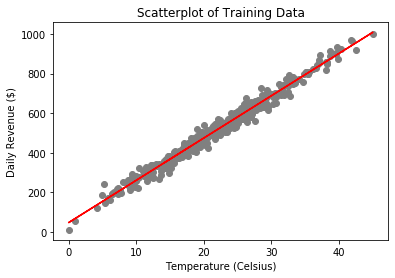

In [96]:
plt.scatter(X_train, y_train, color='gray')
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.ylabel('Daily Revenue ($)')
plt.xlabel('Temperature (Celsius)')
plt.title('Scatterplot of Training Data')
plt.show()

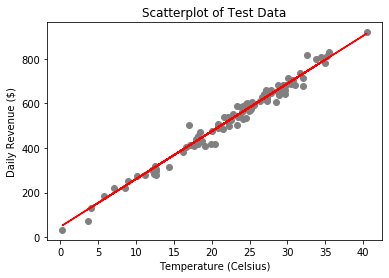

In [98]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, regressor.predict(X_test), color='red')
plt.ylabel('Daily Revenue ($)')
plt.xlabel('Temperature (Celsius)')
plt.title('Scatterplot of Test Data')
plt.show()

## Evaluation of our Regression Model
We will use evaluate the effectiveness of our model to our training data by using statistics metrics of mean squared error (MSE), root mean squared error (RMSE), and $R^2$ or the coefficient of determination:

$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2 $$

$$ RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2} $$

$$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} = 1 - \frac{\sum_i e_i^2}{\sum_i (y_i-\bar{y})^2} $$

In [118]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(y_pred=regressor.predict(X_test), y_true=y_test)
print(f'MSE on test data is: {mse}')
print(f'RMSE on test data is: {sqrt(mse)}')

MSE on test data is: 652.5200612979731
RMSE on test data is: 25.544472225864702


In [111]:
from sklearn.metrics import r2_score
r2 = r2_score(y_pred=regressor.predict(X_test), y_true=y_test)
print(f'R^2 Score is: {r2}')

R^2 Score is: 0.9771532792713993
